In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Singapore', 'Q')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

Text(0.5, 0.98, '2023 Singapore Grand Prix - Qualifying\nFastest Lap: 01:30.984 (SAI)')

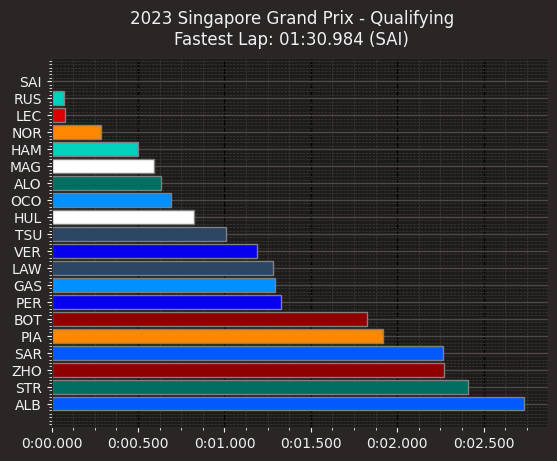

In [2]:
drivers = pd.unique(fp.laps['Driver'])
best_laps = list()
for driver in drivers:
        best_laps.append(fp.laps.pick_driver(driver).pick_fastest())
fastest_laps = Laps(best_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
        color = ff1.plotting.team_color(lap['Team'])
        team_colors.append(color)
        
ff1.plotting.setup_mpl()
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")


C:\Users\ricca\AppData\Local\Temp\ipykernel_14052\3768178828.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_drv1.append(fastest_drv2).append(fastest_drv3).append(fastest_drv4).append(fastest_drv5)
C:\Users\ricca\AppData\Local\Temp\ipykernel_14052\3768178828.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_drv1.append(fastest_drv2).append(fastest_drv3).append(fastest_drv4).append(fastest_drv5)
C:\Users\ricca\AppData\Local\Temp\ipykernel_14052\3768178828.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry = fastest_drv1.append(fastest_drv2).append(fastest_drv3).append(fastest_drv4).append(fastest_drv5)
C:\Users\ricca\AppData\Local\Temp\ipykernel_14052\3768178828.py:

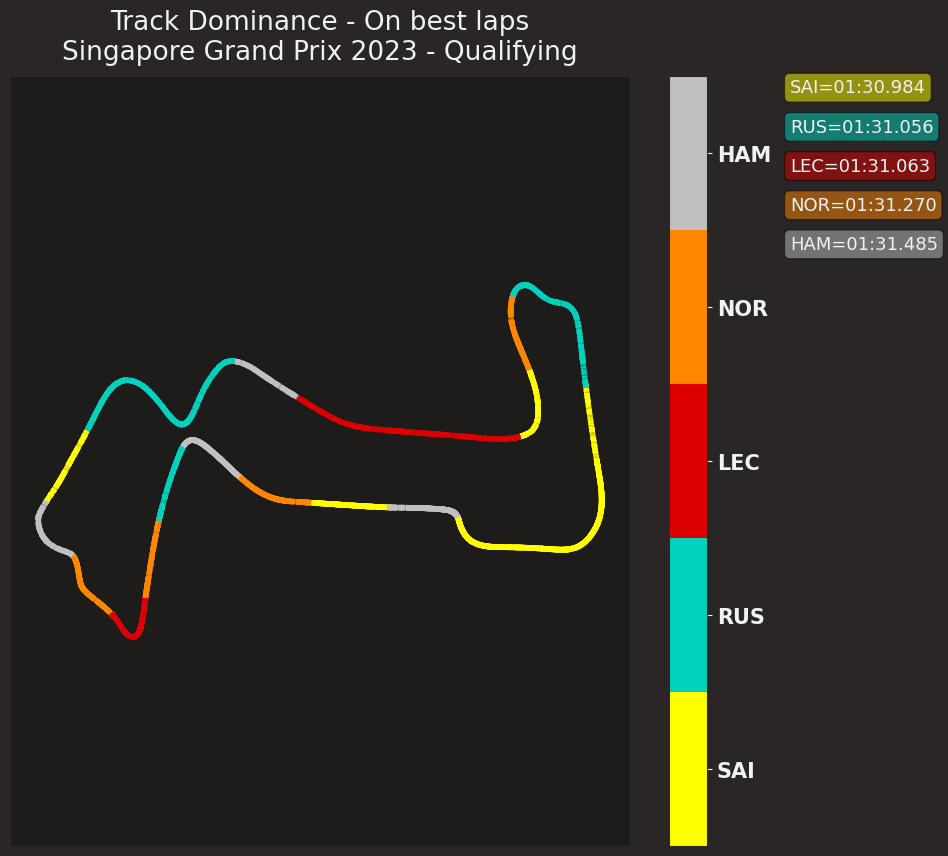

In [8]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
plotting.setup_mpl()
fp_laps = fp.laps
driver1='SAI'
driver2='RUS'
driver3='LEC'
driver4='NOR'
driver5='HAM'

color_drv1 = 'yellow'
color_drv2 = ff1.plotting.team_color('MER')
color_drv3 = ff1.plotting.team_color('FER')
color_drv4 = ff1.plotting.team_color('MCL')
color_drv5 = 'silver'

laps_drv1 = fp_laps.pick_driver(driver1)
laps_drv2 = fp_laps.pick_driver(driver2)
laps_drv3 = fp_laps.pick_driver(driver3)
laps_drv4 = fp_laps.pick_driver(driver4)
laps_drv5 = fp_laps.pick_driver(driver5)

fastest_drv1 = laps_drv1.pick_fastest().get_telemetry().add_distance()
fastest_drv2 = laps_drv2.pick_fastest().get_telemetry().add_distance()
fastest_drv3 = laps_drv3.pick_fastest().get_telemetry().add_distance()
fastest_drv4 = laps_drv4.pick_fastest().get_telemetry().add_distance()
fastest_drv5 = laps_drv5.pick_fastest().get_telemetry().add_distance()

fastest_drv1['Driver'] = driver1
fastest_drv2['Driver'] = driver2
fastest_drv3['Driver'] = driver3
fastest_drv4['Driver'] = driver4
fastest_drv5['Driver'] = driver5


telemetry = fastest_drv1.append(fastest_drv2).append(fastest_drv3).append(fastest_drv4).append(fastest_drv5)

num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))


telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == driver1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == driver2, 'Fastest_driver_int'] = 2
telemetry.loc[telemetry['Fastest_driver'] == driver3, 'Fastest_driver_int'] = 3
telemetry.loc[telemetry['Fastest_driver'] == driver4, 'Fastest_driver_int'] = 4
telemetry.loc[telemetry['Fastest_driver'] == driver5, 'Fastest_driver_int'] = 5

x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

#cmap = cm.get_cmap('cool', 4)
cmap = ListedColormap([color_drv1, color_drv2, color_drv3, color_drv4, color_drv5])
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(4)

plt.rcParams['figure.figsize'] = [10, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plt.title(f"Track Dominance - On best laps\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,7))
cbar.set_ticks(np.arange(1.5, 6.5))
cbar.set_ticklabels([driver1, driver2, driver3, driver4, driver5], fontsize=15, fontweight = 'bold')

plt.text(6000, 9000, f"{driver1}="+str(laps_drv1.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv1, alpha=0.5), fontsize=13)
plt.text(6000, 8000, f"{driver2}="+str(laps_drv2.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv2, alpha=0.5), fontsize=13)
plt.text(6000, 7000, f"{driver3}="+str(laps_drv3.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv3, alpha=0.5), fontsize=13)
plt.text(6000, 6000, f"{driver4}="+str(laps_drv4.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv4, alpha=0.5), fontsize=13)
plt.text(6000, 5000, f"{driver5}="+str(laps_drv5.pick_fastest().LapTime)[10:19], bbox=dict(boxstyle='round', facecolor=color_drv5, alpha=0.5), fontsize=13)

plt.show()